<a href="https://colab.research.google.com/github/nicha0524/DPDM2021/blob/main/Frequent_Patterns_(Association_Rules).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### หา minsup = 40 % & mincon = 70 %
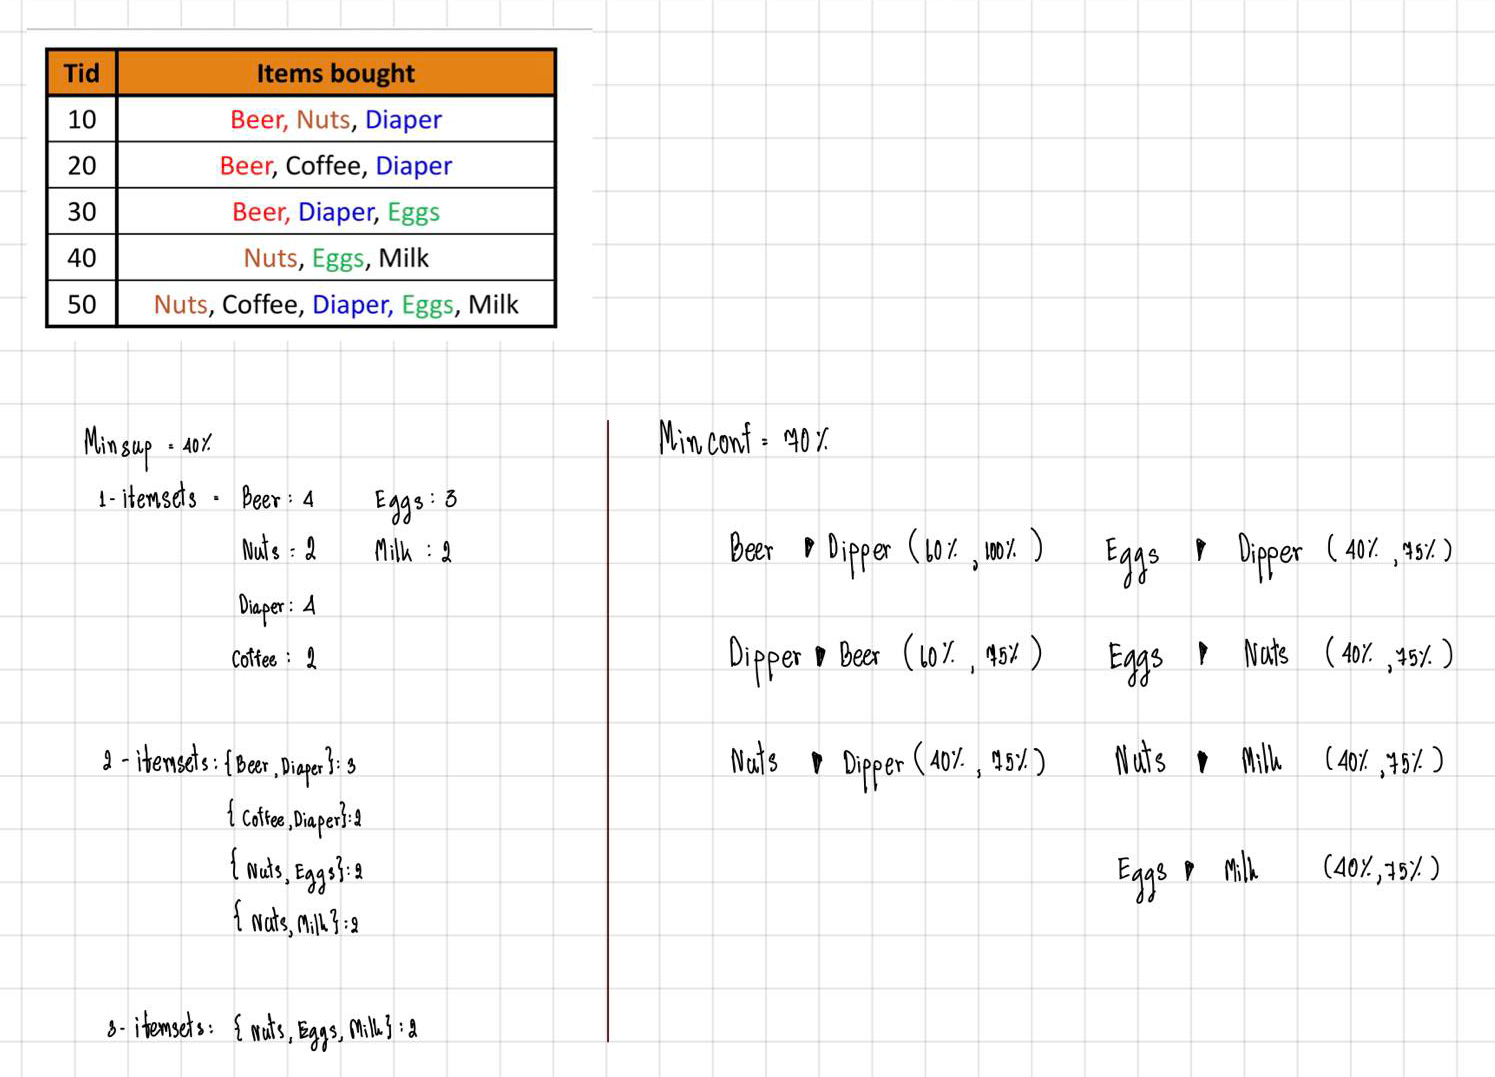

In [1]:
import pandas as pd

In [2]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import os # จัดการไฟล์และ path

In [4]:
path = '/content/drive/My Drive/DPDM2021_DATA' #    เรียกข้อมูลจาก drive
data= pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin=1') # read ข้อมูลจาก Excel โดยใช้ คำสั่ง  pd.read_csv
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


#### Group by
https://stackoverflow.com/questions/17841149/pandas-groupby-how-to-get-a-union-of-strings

In [5]:

data.groupby('InvoiceNo')['StockCode'].apply(list) # จัดกลุ่ม InvoiceNo โดยเก็บค่าทั้งหมดในคอลัม StockCode ใน list ตามกลุ่มของ InvoiceNo

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
C581484                                              [23843]
C581490                                       [22178, 23144]
C581499                                                  [M]
C581568                                              [21258]
C581569                                       [84978, 20979]
Name: StockCode, Length: 25900, dtype: object

In [6]:
data[data['InvoiceNo']=='C581490'] #c คือ 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12/09/2011 09:57,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,14397.0,United Kingdom


In [7]:
data[data['InvoiceNo']=='581490']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [8]:
data_remove_c=data[data['Quantity']>0]

In [9]:

data_remove_c.groupby('InvoiceNo')['StockCode'].apply(list) # เก็บค่าไว้ใน transactions


InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
581586                          [22061, 23275, 21217, 20685]
581587     [22631, 22556, 22555, 22728, 22727, 22726, 227...
A563185                                                  [B]
A563186                                                  [B]
A563187                                                  [B]
Name: StockCode, Length: 20728, dtype: object

In [10]:
data[data['InvoiceNo']=='A563186']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,08/12/2011 14:51,-11062.06,NaN,United Kingdom


#### ติดตั้ง packages 'apyori'


In [11]:
! pip install apyori ## ติดตั้ง packages 'apyori'  เอาไว้หา  minsup & mincon

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=79e7add19efd708dbb643be7b06a2f6b9b903f917483dfa83eb126dbf0399a1f
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [12]:
from apyori import apriori # เรียกใช้ คำสั่ง apriori

In [13]:
frequentItemsets = list(apriori(transactions,min_support = 0.03)) # หา minsup ของ transactions มีอย่างน้อย 7.5%
frequentItemsets

NameError: ignored

In [ ]:
frequentItemsets[-1]

In [ ]:
frequentItemsets = list(apriori(transactions,min_support = 0.02)) 
frequentItemsets[-1]

In [ ]:
list(frequentItemsets[-1])

## quiz 11
1.supermarket นี้มีสาขาในกี่ประเทศ    
 2.วาดกราฟยอดขายของแต่ละประเทส
3.หา association rules ที่น่าสนใจโดยพิจารณา ลูกค้ารายบุคคล

In [15]:
data_remove_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [16]:
data_c=data_remove_c.groupby('Country').count()

In [17]:
data_c.shape[0]

38

In [19]:
list(data_g['Country'])

['Saudi Arabia',
 'Bahrain',
 'RSA',
 'Brazil',
 'Lebanon',
 'European Community',
 'Lithuania',
 'Czech Republic',
 'Malta',
 'United Arab Emirates',
 'Greece',
 'USA',
 'Iceland',
 'Canada',
 'Unspecified',
 'Poland',
 'Israel',
 'Hong Kong',
 'Austria',
 'Singapore',
 'Cyprus',
 'Italy',
 'Denmark',
 'Channel Islands',
 'Finland',
 'Portugal',
 'Norway',
 'Belgium',
 'Japan',
 'Spain',
 'Switzerland',
 'Sweden',
 'Australia',
 'France',
 'Germany',
 'EIRE',
 'Netherlands',
 'United Kingdom']

In [31]:
data_remove_c['sales']=data_remove_c['Quantity']*data_remove_c['UnitPrice']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
data_remove_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


In [37]:
data_g=data_remove_c.groupby('Country').sum().sort_values(by='sales').reset_index().iloc[:,[0,4]] 
data_g

,Country,sales
0,Saudi Arabia,1.459200e+02
1,Bahrain,7.541400e+02
2,Czech Republic,8.267400e+02
3,RSA,1.002310e+03
4,Brazil,1.143600e+03
5,European Community,1.300250e+03
6,Lithuania,1.661060e+03
7,Lebanon,1.693880e+03
8,United Arab Emirates,1.902280e+03
9,Malta,2.725590e+03


In [38]:
labels = list(data_g['Country'])
total_sales = list(data_g['sales'])

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

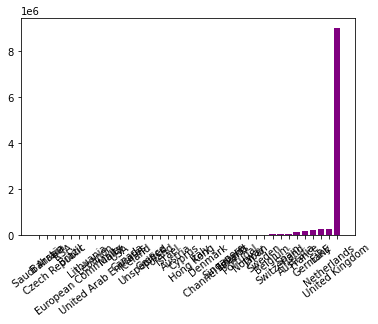

In [39]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,38)
ax = plt.gca(xticks= x)
ax.set_xticklabels( labels  ,rotation=38)
plt.bar(x, total_sales,color='purple' )
plt.show()

3.หา association rules ที่น่าสนใจโดยพิจารณา ลูกค้ารายบุคคล

In [22]:
data_remove_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


จำนวนสมาชิกของแต่ละประเทศ

In [23]:
data_remove_c=data[data['Quantity']>0]

In [24]:
data_remove_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [25]:
B=data_remove_c.groupby('CustomerID')['StockCode'].apply(list) 

In [42]:
c=list(apriori(B,min_support = 0.05)) 
list(c[-5])

[frozenset({'22423', '22697', '22698'}),
 0.056464623185065684,
 [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423', '22697', '22698'}), confidence=0.056464623185065684, lift=1.0),
  OrderedStatistic(items_base=frozenset({'22423'}), items_add=frozenset({'22697', '22698'}), confidence=0.2780930760499432, lift=4.076506273583458),
  OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22423', '22698'}), confidence=0.6330749354005168, lift=10.605838396536072),
  OrderedStatistic(items_base=frozenset({'22698'}), items_add=frozenset({'22423', '22697'}), confidence=0.7680250783699061, lift=11.220406784670109),
  OrderedStatistic(items_base=frozenset({'22423', '22697'}), items_add=frozenset({'22698'}), confidence=0.8249158249158249, lift=11.220406784670109),
  OrderedStatistic(items_base=frozenset({'22423', '22698'}), items_add=frozenset({'22697'}), confidence=0.9459459459459459, lift=10.605838396536072),
  OrderedStatistic(items_base=frozenset({'22697', 

In [ ]:
data_remove_c[data_remove_c['StockCode']==]

In [28]:
import pandas as pd


In [29]:
D=pd.DataFrame()


In [ ]:
data_remove_c

In [ ]:
data_remove_c.groupby('CustomerID')['StockCode'].apply(list) 